#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [1]:
# Whether use gpu-based wave-optics simulation or not.
# With gpu=False, only ray-tracing calculation is performed. 
gpu = False

In [2]:
import sys

sys.path.append("../../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = ['serif']
matplotlib.rcParams['font.size'] = 12

from XRaySimulation import util, RockingCurve, Pulse

# Level 1: simulate the XPP and the X-ray
import Controller

if gpu:
    import gpuWaveOptics

# Level 2: Develop the auto-alignment algorithm which control either the simulator or XPP controller through the parser.
import parser

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [3]:
# Create a controller object as we have at XPP
x = Controller.XppController_TG()
x.t1.optics.crystal_list[0].boundary[3][-1] = 10e3 / np.tan(np.deg2rad(15)) + x.t1.optics.crystal_list[0].boundary[0][
    -1]

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=9.8,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y 

### Define functions on the fly

In [4]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)


def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)


def move_delay0(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(val)


def move_delay(val):
    _ = x.t45.delay_umvr(val)


def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = x.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = x.sample.x_umv(22804.9636)


def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = x.sample.z_umv(0)
    print("Move sample.x")
    _ = x.sample.x_umv(0)


def move_sample_yag():
    pass


def optimize_miniSD_alignment(gpu_flag=gpu):
    pass


def optimize_CC_VCC_overlap(gpu_flag=gpu):
    pass

### Development the auto-alignment algorithm in this cell

In [5]:
pass

### Preparation: Align the mono

Motor moved from 0.00000 to -17.88927 degree
Motor moved from 0.00000 to -17.88927 degree
Motor moved from -17.88927 to -17.89087 degree
Motor moved from -17.88927 to -17.89107 degree


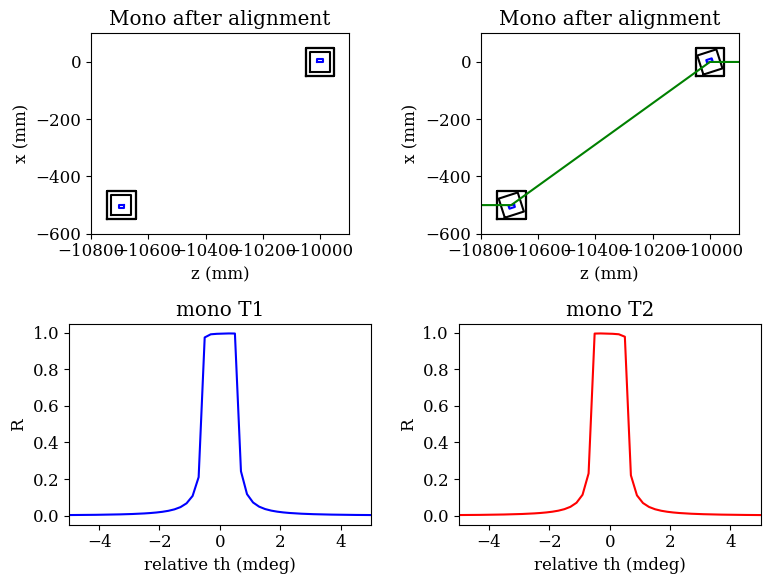

In [6]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0])

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 19.23525 to 19.24281 degree
Motor moved from 19.23525 to 19.22953 degree
Motor moved from 19.23525 to 19.22811 degree
Motor moved from 19.23525 to 19.24494 degree
Motor moved from 19.23525 to 19.24505 degree
Motor moved from 19.23525 to 19.22792 degree
Motor moved from 0.0000 um to to -6591.4204 um
Motor moved from 0.0000 um to to 3070.1742 um
Motor moved from 0.0000 um to to -300.0000 um
Motor moved from 0.0000 um to to 300.0000 um


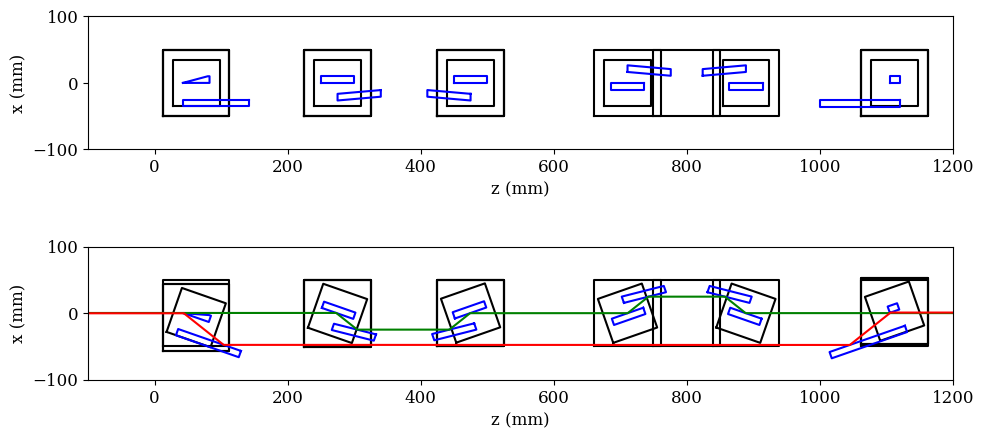

In [7]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = x.align_miniSD()
# Move the t1x such that the tip is avoiding the x-ray
displacement = - x.t1.optics.crystal_list[0].boundary[0][1]
x.t1.x_umv(displacement)

displacement = - x.t6.optics.crystal_list[1].boundary[0][1]
x.t6.x_umv(displacement + 600)
move_vcc(-300)

x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

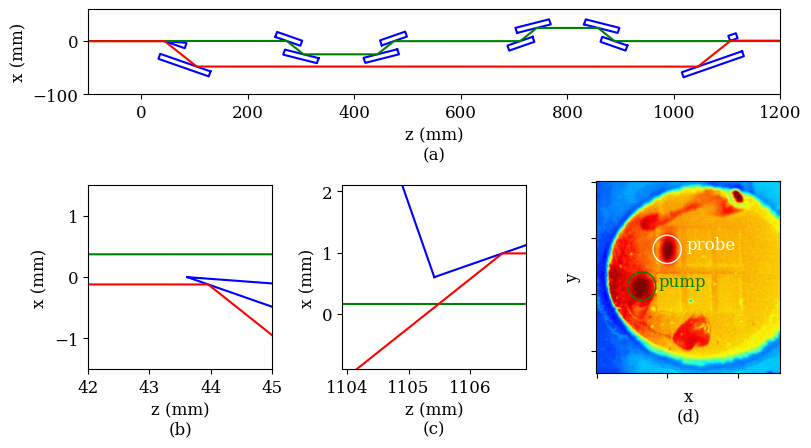

In [8]:
fig3 = plt.figure(constrained_layout=True, figsize=(8, 5))
gs = fig3.add_gridspec(2, 3)

# Show the sdo trajectory
f3_ax1 = fig3.add_subplot(gs[0, :])
x.plot_miniSD_table(ax=f3_ax1, xlim=None, ylim=[-100, 60], show_trajectory=True, show_device=False)
f3_ax1.set_xlabel("z (mm)\n(a)")

f3_ax2 = fig3.add_subplot(gs[1, 0])
x.plot_miniSD_table(ax=f3_ax2, xlim=[42, 45], ylim=[-1.5, 1.5], show_trajectory=True, show_device=False)
f3_ax2.set_xlabel("z (mm)\n(b)")

f3_ax3 = fig3.add_subplot(gs[1, 1])
position = x.t6.optics.crystal_list[1].boundary[0] / 1000
x.plot_miniSD_table(ax=f3_ax3,
                    xlim=[position[2] - 1.5, position[2] + 1.5],
                    ylim=[position[1] - 1.5, position[1] + 1.5],
                    show_trajectory=True, show_device=False)
f3_ax3.set_xlabel("z (mm)\n(c)")

"""
f3_ax4 = fig3.add_subplot(gs[1, 2])
position = np.copy(x.tg_g.grating_1.surface_point) / 1000
x.tg_g.x_umv(5600 - 30)
x.plot_miniSD_table(ax=f3_ax4,
                    xlim=[position[2]-5, position[2]+5],
                    ylim=[-1, 2],
                    show_trajectory=True, show_device=False)
f3_ax4.set_aspect("auto")
"""

f3_ax5 = fig3.add_subplot(gs[1, 2])
img = plt.imread("./attachment.png", format='png')
f3_ax5.imshow(img)
#f3_ax5.set_axis_off()
f3_ax5.set_xlabel("x\n(d)")
f3_ax5.set_ylabel("y")
f3_ax5.set_xticklabels("")
f3_ax5.set_yticklabels("")

circle1 = plt.Circle((160, 370), 50, edgecolor='green', fill=False)
circle2 = plt.Circle((250, 240), 50, edgecolor='white', fill=None)
f3_ax5.add_patch(circle1)
f3_ax5.text(x=220, y=370, s="pump", color='green')
f3_ax5.add_patch(circle2)
f3_ax5.text(x=320, y=240, s="probe", color='white')

plt.savefig("./sd_trajectory.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
fig3 = plt.figure(constrained_layout=True, figsize=(8, 5))
gs = fig3.add_gridspec(2, 3)

# Show the sdo trajectory
f3_ax1 = fig3.add_subplot(gs[0, :])
x.plot_miniSD_table(ax=f3_ax1, xlim=None, ylim=[-100, 60], show_trajectory=True, show_device=False)
f3_ax1.set_xlabel("z (mm)\n(a)")

f3_ax2 = fig3.add_subplot(gs[1, 0])
x.plot_miniSD_table(ax=f3_ax2, xlim=[42, 45], ylim=[-1.5, 1.5], show_trajectory=True, show_device=False)
f3_ax2.set_xlabel("z (mm)\n(b)")

f3_ax3 = fig3.add_subplot(gs[1, 1])
position = x.t6.optics.crystal_list[1].boundary[0] / 1000
x.plot_miniSD_table(ax=f3_ax3,
                    xlim=[position[2] - 1.5, position[2] + 1.5],
                    ylim=[position[1] - 1.5, position[1] + 1.5],
                    show_trajectory=True, show_device=False)
f3_ax3.set_xlabel("z (mm)\n(c)")

"""
f3_ax4 = fig3.add_subplot(gs[1, 2])
position = np.copy(x.tg_g.grating_1.surface_point) / 1000
x.tg_g.x_umv(5600 - 30)
x.plot_miniSD_table(ax=f3_ax4,
                    xlim=[position[2]-5, position[2]+5],
                    ylim=[-1, 2],
                    show_trajectory=True, show_device=False)
f3_ax4.set_aspect("auto")
"""

f3_ax5 = fig3.add_subplot(gs[1, 2])
img = plt.imread("./attachment.png", format='png')
f3_ax5.imshow(img)
#f3_ax5.set_axis_off()
f3_ax5.set_xlabel("x\n(d)")
f3_ax5.set_ylabel("y")
f3_ax5.set_xticklabels("")
f3_ax5.set_yticklabels("")

circle1 = plt.Circle((160, 370), 50, edgecolor='green', fill=False)
circle2 = plt.Circle((250, 240), 50, edgecolor='white', fill=None)
f3_ax5.add_patch(circle1)
f3_ax5.text(x=220, y=370, s="pump", color='green')
f3_ax5.add_patch(circle2)
f3_ax5.text(x=320, y=240, s="probe", color='white')

plt.savefig("./sd_trajectory.png", bbox_inches='tight', dpi=300)
plt.show()

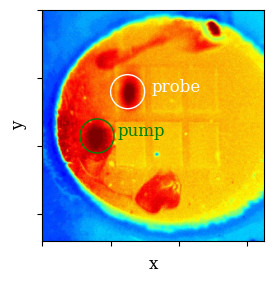

In [12]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(3, 3))

img = plt.imread("./attachment.png", format='png')
axis.imshow(img)
axis.set_xlabel("x")
axis.set_ylabel("y")

axis.set_xticklabels("")
axis.set_yticklabels("")

circle1 = plt.Circle((160, 370), 50, edgecolor='green', fill=False)
circle2 = plt.Circle((250, 240), 50, edgecolor='white', fill=None)
axis.add_patch(circle1)
axis.text(x=220, y=370, s="pump", color='green')
axis.add_patch(circle2)
axis.text(x=320, y=240, s="probe", color='white')

plt.savefig("./g_tg.png", bbox_inches='tight', dpi=300)
plt.show()


In [14]:
0.75 / np.tan(np.deg2rad(14.5/2) / 1000)

5927.149573167527

In [ ]:
fx.t6.optics.crystal_list[1].boundary[0]

In [ ]:
x.t6.optics.crystal_list[0].boundary[0]

In [ ]:
# Move the t1x such that the tip is avoiding the x-ray
displacement = - x.t1.optics.crystal_list[0].boundary[0][1]
x.t1.x_umv(displacement)


In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

x.plot_miniSD_rocking(ax_list=np.reshape(ax, 6))

plt.tight_layout()
plt.show()

# Step 1: Find the X-ray pulse after miniSD on the downstream YAG after the miniSD

In [ ]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(5)
fig.set_figwidth(8)

x.plot_beam_on_yag(ax=ax)

plt.tight_layout()
plt.show()

# Step 2: Align the probe beam such that it overlap with the CC beam
## Step 2a: Find the beam after the mirror 1 on the YAG


In [ ]:
# Assume that we have calibrated the incident angle
_ = x.m1.pi_umv(np.deg2rad(0.1))

# Move the mirror position such that the interaction point with the mirror is at location z=4e6
path_ref = x.get_raytracing_trajectory(path="probe m1 only")
_ = x.m1.y_umvr(100)
path_new = x.get_raytracing_trajectory(path="probe m1 only")

coef = path_new[0][-2][2] - path_ref[0][-2][2]
total_diff = x.m1.optics.surface_point[2] - path_new[0][-2][2]
print("Move the TG-a pulse {:.5f} um in y axis by moving m1y 100 um".format(coef))
print("Need to move m1y {:.5f} um to compensate the total difference of {:.5f} um".format(
    total_diff / coef * 100, total_diff))
_ = x.m1.y_umvr(total_diff / coef * 100)

In [ ]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_m1_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

## Step 2b Align the silicon 111 crystal

### Align Bragg angle

In [ ]:
# During operation, we need to make sure first that the X-ray is hiting on the si 111 crsytal
# Get the theoretical Bragg angle
bragg_si111 = util.get_bragg_angle(wave_length=np.pi * 2 / x.gaussian_pulse.klen0,
                                   plane_distance=Controller.si111['thickness'])

# Account for the 10 deg of the adaptor tilting
ang_diff = bragg_si111 - np.deg2rad(10)

# Rotate the crystal by the remaining angle
_ = x.si.pi_umv(ang_diff)

# Get the rocking curve from this crystal
(angles1, reflect_sigma1,
 reflect_pi1, b_factor1, kout1) = RockingCurve.get_rocking_curve_around_axis(
    kin=x.gaussian_pulse.k0,
    scan_range=np.array([-np.deg2rad(0.1), np.deg2rad(0.1)]),
    scan_number=10 ** 4,
    rotation_axis=x.si.pi.rotation_axis,
    crystal=x.si.optics, )

# Get the target bragg peak
fwhm, angle_adjust, index = util.get_fwhm(coordinate=angles1,
                                          curve_values=np.square(np.abs(reflect_pi1)),
                                          center=True,
                                          get_index=True)

# Move the crystal to the target path
_ = x.si.pi_umv(target=x.si.pi.control_location + angle_adjust)

### Align silicon position and overlap

In [ ]:
# Align the vertical overlap with the reference pump pulse
probe_old_traj, kout, probe_old_path = x.get_raytracing_trajectory(path="probe")
_ = x.si.y_umvr(100)
probe_new_traj, kout, probe_new_path = x.get_raytracing_trajectory(path="probe")
pump_ref_traj, kout, pump_ref_path = x.get_raytracing_trajectory(path="cc")

coef = probe_new_traj[-1][0] - probe_old_traj[-1][0]
total_diff = pump_ref_traj[-1][0] - probe_new_traj[-1][0]

print("Move the probe pulse {:.5f} um in y axis by moving siy 100 um".format(coef))
print("Need to move siy {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                          total_diff))
_ = x.si.y_umvr(total_diff / coef * 100)

In [ ]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [ ]:
move_yag()

# get current position of the beams on the yag
beam_pos_1 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_1['probe'] - beam_pos_1['cc'])

# Walk the motors a little bit
move_vcc(100)

# get current position of the beams on the yag
beam_pos_2 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_2['probe'] - beam_pos_2['cc'])

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_2['probe'] - beam_pos_1['probe']
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the t2x and t3x by 100 um")

delta = (beam_pos_2['cc'] - beam_pos_2['probe'])[1] / change[1] * 100

print("The current total difference is", beam_pos_2['cc'] - beam_pos_2['probe'])
print("Needs to move {}um to elimiate the horizontal difference".format(delta))

move_vcc(delta)

beam_pos_3 = x.get_beam_position_on_yag()
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_3['cc'] - beam_pos_3['probe'])

# Step 3: Align the total reflection mirrors for the pump pulse for 5nm

In [ ]:
move_yag()

_ = x.m2a.yaw_umv(np.deg2rad(0.35))
_ = x.m2b.yaw_umv(np.deg2rad(0.35))

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

In [ ]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

In [ ]:
move_yag()

# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[8000, 8300], )
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[8000, 8300])

plt.tight_layout()
plt.show()

### Align the miniSD location for time 0

In [ ]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

In [ ]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 3: Align the total reflection mirrors for the pump pulse for 7nm

In [ ]:
_ = x.m2a.yaw_umv(np.deg2rad(0.25))
_ = x.m2b.yaw_umv(np.deg2rad(0.25))
x.m2a.z_umv(49e3)
x.m2b.z_umv(49e3)

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

In [ ]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

In [ ]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[7900, 8200], )
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[7900, 8200])

plt.tight_layout()
plt.show()

In [ ]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

In [ ]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 3: Align the total reflection mirrors for the pump pulse for 15nm

In [ ]:
x.m2a.z.control_limits

In [ ]:
_ = x.m2a.yaw_umv(np.deg2rad(0.12))
_ = x.m2b.yaw_umv(np.deg2rad(0.12))
x.m2a.z_umv(-49e3)
x.m2b.z_umv(-49e3)

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

In [ ]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

In [ ]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[7900, 8200], )
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[7900, 8200])

plt.tight_layout()
plt.show()

In [ ]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

In [ ]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 4: Find the X-ray beam on the sample YAG screen

In [ ]:
# Step 1: Move the sample to the location of the YAG
move_sample()

# Step 5: Refine the spatial overlap

In [ ]:
x.sample.x_umvr(-1)

In [ ]:
x.sample.x_umvr(-1)

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [ ]:
x.sample.z_umvr(-1)

In [ ]:
x.sample.z_umv(11565.5671)

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

### It seems that by ajusting the position of the sample stage motors, one cannot achieve good quality overlap

In [ ]:
x.sample.z_umv(11565.5671)
x.sample.x_umv(21650.9636)

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

In [ ]:
x.si.y_umvr(-1)

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

In [ ]:
x.si.roll.user_get_position()

In [ ]:
x.si.roll.control_limits

In [ ]:
x.si.roll_umv(np.deg2rad(0.0))

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

In [ ]:
x.sample.x_umvr(1)

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

# Step 6: Find the delay time

In [ ]:
pathLenght = x.get_arrival_time()

In [ ]:
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

# Step 7: Calculate the Ewarld sphere and Q space coverage during rotation

In [ ]:
10 / np.arcsin(np.deg2rad(5))

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['pump b']

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['cc']

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump b'] - beam_path_sample['cc']

In [ ]:
x.m2a.x_umvr(-1)

In [ ]:
x.m2a.x_umvr(1)

In [ ]:
beam_path_sample = x.get_beam_position_on_sample_yag()
print(beam_path_sample['pump a'] - beam_path_sample['cc'])
print(beam_path_sample['pump b'] - beam_path_sample['cc'])

In [ ]:
pathLenght = x.get_path_length()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c / 1000)

In [ ]:
(beam_path_sample['pump a'] - beam_path_sample['pump b']) / util.c

In [ ]:
1 / np.tan(np.deg2rad(5)) / util.c